In [2]:
import pandas as pd  
df = pd.read_feather("predictions_test_512rbt.feather") 
df.shape


(19802, 7944)

In [ ]:
df.head()  

,00160J6,00163J6,00164J6,008Q4ZZ,009400Z,00940ZZ,009430Z,00943ZZ,009600Z,009630Z,...,Z98.62,Z98.84,Z98.89,Z98.890,Z99.11,Z99.2,Z99.3,Z99.81,target,_id
0,1.783667e-06,9.656873e-07,2.091545e-06,0.000002,1.205985e-06,1.053702e-06,0.000002,1.792698e-06,4.668559e-07,2.287084e-06,...,0.000012,0.000280,0.000016,0.000220,0.000008,0.000058,0.000064,0.000026,"[C16.9, C78.4, D63.0, D63.8, D64.81, Z51.11, Z...",22693585
1,1.563114e-06,1.109966e-06,1.852138e-06,0.000002,1.185102e-06,9.284091e-07,0.000002,1.588864e-06,5.110868e-07,1.889592e-06,...,0.000008,0.000372,0.000012,0.000044,0.000006,0.000016,0.000050,0.000024,"[C79.9, D63.0, D64.81, R10.9, R53.83, Z51.11, ...",23212121
2,2.405777e-06,1.737803e-06,1.275389e-06,0.000006,1.920641e-06,1.456325e-06,0.000005,1.882205e-06,6.716981e-07,4.165830e-06,...,0.000013,0.000274,0.000026,0.000058,0.000011,0.000069,0.000078,0.000092,"[C20, D69.6, F17.210, F41.9, K90.0, R11.0, Z88.8]",22683444
3,6.576307e-06,9.939043e-07,1.563936e-07,0.000004,9.945340e-07,1.947508e-06,0.000006,3.248038e-07,3.208204e-07,2.306518e-07,...,0.000004,0.000099,0.000016,0.000012,0.000233,0.000007,0.000172,0.000052,"[02HV33Z, 5A12012, 5A1935Z, E87.2, I46.9, I95....",24459329
4,9.606694e-07,8.014830e-07,1.683528e-06,0.000002,9.026168e-07,7.204921e-07,0.000001,1.181534e-06,3.522347e-07,1.202996e-06,...,0.000006,0.000384,0.000010,0.000041,0.000010,0.000111,0.000037,0.000150,"[C56.9, I10, Z14.8, Z51.11, Z88.8]",23279314


: 

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Choose the ICD-10 code
code = "I11.0"

# True labels: check if the code is in the target list
y_true = df["target"].apply(lambda codes: code in codes).astype(int)

# Predicted labels: threshold the probability (default = 0.5)
y_pred = (df[code] >= 0.5).astype(int)

# Compute metrics
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print(f"ICD-10 {code} — Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

ICD-10 I11.0 — Precision: 0.7232, Recall: 0.7204, F1: 0.7218


In [8]:
code = "I11.0"

# Count how many target lists contain E11.9
freq = df["target"].apply(lambda codes: code in codes).sum()

print(f"ICD-10 {code} appears {freq} times in the dataset.")

ICD-10 I11.0 appears 1291 times in the dataset.


In [3]:
# All symptom codes (ICD-10 R00–R99)
symptom_codes = [col for col in df.columns if col.startswith("R") and not col in ["target", "_id"]]

print(f"Found {len(symptom_codes)} symptom codes have 'with' in dataset")
print(symptom_codes[:20])  # show first 20

Found 345 symptom codes have 'with' in dataset
['R00.0', 'R00.1', 'R00.2', 'R00.8', 'R01.1', 'R03.0', 'R03.1', 'R04.0', 'R04.1', 'R04.2', 'R04.89', 'R05', 'R06.00', 'R06.01', 'R06.02', 'R06.03', 'R06.09', 'R06.1', 'R06.2', 'R06.3']


In [4]:
from sklearn.metrics import f1_score

# Get all ICD-10 symptom codes (R00–R99) from dataframe
symptom_codes = [col for col in df.columns if col.startswith("R") and col not in ["target", "_id"]]

y_true_symptoms = []
y_pred_symptoms = []

for code in symptom_codes:
    y_true = df["target"].apply(lambda codes: code in codes).astype(int)
    y_pred = (df[code] >= 0.5).astype(int)

    y_true_symptoms.append(y_true)
    y_pred_symptoms.append(y_pred)

import numpy as np
y_true_symptoms = np.array(y_true_symptoms).T
y_pred_symptoms = np.array(y_pred_symptoms).T



In [5]:
micro_f1_symptoms = f1_score(y_true_symptoms, y_pred_symptoms, average="micro", zero_division=0)
micro_f1_symptoms



0.4467496542185339

In [6]:
macro_f1_symptoms = f1_score(y_true_symptoms, y_pred_symptoms, average="macro", zero_division=0)
macro_f1_symptoms

0.1823191974509048

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

# Load both models' predictions
df_base = pd.read_feather("predictions_test128.feather")   # baseline modernbert
df_new  = pd.read_feather("predictions_test6000.feather")     # modernBERT no chunking


codes = [c for c in df_new.columns if c not in ["target", "_id"]]


y_true = np.zeros((len(df_new), len(codes)), dtype=int)
for i, targets in enumerate(df_new["target"]):
    for t in targets:
        if t in codes:
            y_true[i, codes.index(t)] = 1

# Step 2: build y_pred matrices (threshold at 0.5)
y_pred_base = (df_base[codes].values >= 0.5).astype(int)
y_pred_new  = (df_new[codes].values  >= 0.5).astype(int)


freq = y_true.sum(axis=0)


f1_base = np.array([f1_score(y_true[:, i], y_pred_base[:, i], zero_division=0) for i in range(len(codes))])
f1_new  = np.array([f1_score(y_true[:, i], y_pred_new[:, i],  zero_division=0) for i in range(len(codes))])


improvement = f1_new - f1_base


results = pd.DataFrame({
    "code": codes,
    "frequency": freq,
    "f1_base": f1_base,
    "f1_new": f1_new,
    "improvement": improvement
})


results = results[results["frequency"] > 1000].sort_values("improvement", ascending=False)

print(results.head(10))  

         code  frequency   f1_base    f1_new  improvement
3650    I13.0       1158  0.703669  0.810036     0.106367
3649    I12.9       1515  0.690971  0.780779     0.089808
3646    I11.0       1291  0.683164  0.763665     0.080501
7810  Z87.891       5976  0.410852  0.469789     0.058937
2837   E11.22       1528  0.794340  0.843012     0.048672
2976    E87.1       1474  0.659513  0.705930     0.046417
149   02HV33Z       1572  0.611451  0.654381     0.042930
2689    D64.9       1997  0.419411  0.454604     0.035193
2683      D62       1591  0.710343  0.743894     0.033552
4594   K59.00       1160  0.507754  0.538286     0.030532


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

df = pd.read_feather("predictions_test_128rbt.feather")

code_cols = [c for c in df.columns if c not in {"target", "_id"}]

hyp_prefixes = ("I10", "I11", "I12", "I13", "I15")
hyp_cols = [c for c in code_cols if isinstance(c, str) and c.startswith(hyp_prefixes)]

y_true_hyp = pd.DataFrame(0, index=df.index, columns=hyp_cols, dtype=int)
for i, codes in enumerate(df["target"]):
    for c in codes:
        if c in y_true_hyp.columns:
            y_true_hyp.iat[i, y_true_hyp.columns.get_loc(c)] = 1

THRESH = 0.5 # Threshold for predictions for all models
y_pred_hyp = (df[hyp_cols] >= THRESH).astype(int)

micro_f1_hyp = f1_score(y_true_hyp.values, y_pred_hyp.values, average="micro", zero_division=0)
print(f"Hypertension block (I10–I15) micro-F1: {micro_f1_hyp:.4f}")

for pref in hyp_prefixes:
    pref_cols = [c for c in hyp_cols if c.startswith(pref)]
    if pref_cols:
        mf1 = f1_score(y_true_hyp[pref_cols].values, y_pred_hyp[pref_cols].values, average="micro", zero_division=0)
        print(f"{pref} micro-F1: {mf1:.4f}")


Hypertension block (I10–I15) micro-F1: 0.8020
I10 micro-F1: 0.8964
I11 micro-F1: 0.6987
I12 micro-F1: 0.7177
I13 micro-F1: 0.7287
I15 micro-F1: 0.0000


In [ ]:
import pandas as pd

codes = [c for c in df.columns if c not in ["target", "_id"]]

freq = {c: 0 for c in codes}
for targets in df["target"]:
    for t in targets:
        if t in freq:
            freq[t] += 1

freq_df = pd.DataFrame(list(freq.items()), columns=["code", "frequency"])

freq_df["block"] = freq_df["code"].str[:3]

# Keep only hypertensive disease blocks I10–I15
hypertension_df = freq_df[freq_df["block"].isin(["I10", "I11", "I12", "I13", "I15"])]

# Group by block
block_freq = hypertension_df.groupby("block")["frequency"].sum().sort_values(ascending=False)

print("Frequencies of hypertensive disease ICD-10 blocks (I10–I15):")
print(block_freq)


Frequencies of hypertensive disease ICD-10 blocks (I10–I15):
block
I10    7041
I12    1956
I13    1484
I11    1318
I15      21
Name: frequency, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
all_codes = list(itertools.chain.from_iterable(df["target"]))

code_counts = Counter(all_codes)

freq_df = pd.DataFrame(code_counts.items(), columns=["code", "frequency"]).sort_values("frequency", ascending=False)


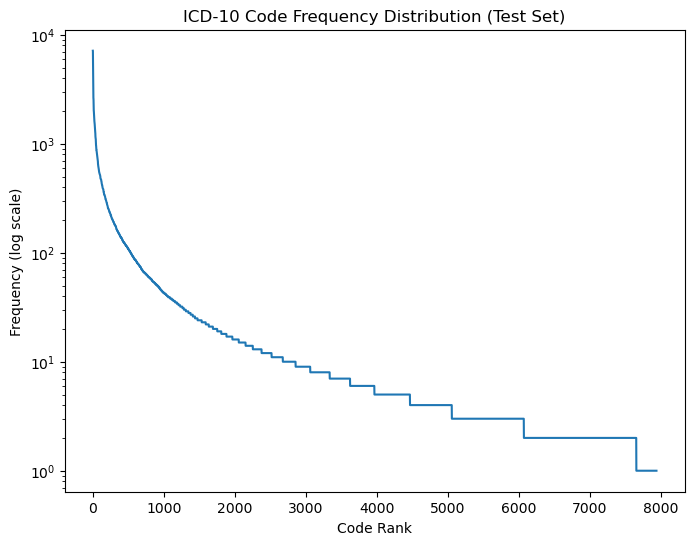

In [23]:
plt.figure(figsize=(8,6))
plt.plot(freq_df["frequency"].values)
plt.yscale("log")
plt.xlabel("Code Rank")
plt.ylabel("Frequency (log scale)")
plt.title("ICD-10 Code Frequency Distribution (Test Set)")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_parquet("train.parquet")
print(df.columns)

Index(['note_id', 'subject_id', '_id', 'note_type', 'text',
       'diagnosis_code_type', 'procedure_code_type', 'diagnosis_codes',
       'procedure_codes'],
      dtype='object')


In [ ]:
df.head() 

,note_id,subject_id,_id,note_type,text,diagnosis_code_type,procedure_code_type,diagnosis_codes,procedure_codes
0,10985008-DS-24,10985008,22184423,discharge_summary,\nName: ___ Unit No: __...,icd10cm,icd10pcs,"[E87.0, J69.0, E43, I48.0, Z91.81, Z86.73, E78...",[0DH63UZ]
1,17023989-DS-16,17023989,27409766,discharge_summary,\nName: ___. Unit No: ___\...,icd10cm,None,"[L90.0, K21.9, J18.9, K20.9, J96.91, R51, I10]",None
2,19451054-DS-35,19451054,22572405,discharge_summary,\nName: ___ Unit No: ___...,icd10cm,None,"[R11.2, R19.7, I10, I25.2, Z96.651, M19.90, Z9...",None
3,18173252-DS-19,18173252,20970917,discharge_summary,\nName: ___ Unit No: ___\...,icd10cm,None,"[I26.99, I42.6, N39.0, I47.1, G30.9, B96.1, E0...",None
4,19129702-DS-21,19129702,21153380,discharge_summary,\nName: ___ Unit No: ___...,icd10cm,None,"[N17.9, M25.571, I25.2, Y92.009, G89.21, I26.9...",None


In [ ]:
diag_counts = (
    df.explode("diagnosis_codes")["diagnosis_codes"]
    .value_counts()
)

proc_counts = (
    df.explode("procedure_codes")["procedure_codes"]
    .value_counts()
)

print("Top 10 diagnosis codes:")
print(diag_counts.head(10))

print("\nTop 10 procedure codes:")
print(proc_counts.head(10))

diag_counts.to_csv("diagnosis_code_counts.csv", header=["count"])
proc_counts.to_csv("procedure_code_counts.csv", header=["count"])

Top 10 diagnosis codes:
diagnosis_codes
E78.5      32176
I10        31718
Z87.891    26428
K21.9      22374
F32.9      16602
I25.10     16308
N17.9      14377
F41.9      13693
Z79.01     11143
Z79.4      11006
Name: count, dtype: int64

Top 10 procedure codes:
procedure_codes
02HV33Z    6904
3E0G76Z    3523
B211YZZ    2639
5A1221Z    2528
0BH17EZ    2358
0DJ08ZZ    2178
5A1945Z    1962
3E04305    1631
5A1955Z    1580
5A1D70Z    1513
Name: count, dtype: int64


In [ ]:
import pandas as pd
import ast

def load_counts(path):
    df = pd.read_csv(path, index_col=0)  
    # Ensure we return a Series: index=code, values=count
    s = df.iloc[:, 0]
    s.name = "count"
    return s

diag_counts = load_counts("diagnosis_code_counts.csv")
proc_counts = load_counts("procedure_code_counts.csv")

def band_count(n: int) -> str:
    if n <= 10:
        return "1-10"
    elif n <= 20:
        return "10-20"
    elif n <= 50:
        return "20-50"
    elif n <= 500:
        return "50-500"
    else:
        return "500+"

diag_bands_map = diag_counts.map(band_count)
proc_bands_map = proc_counts.map(band_count)

# --- Load ONLY the target column from the test set and explode it ---

df_targets = pd.read_feather("predictions_test_2048.feather", columns=["target"])
targets = df_targets["target"]

# If stored as string like "['C16.9', 'C78.4', ...]", convert to Python lists
if targets.dtype == object and targets.apply(lambda x: isinstance(x, str)).any():
    targets = targets.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

test_codes = targets.explode().dropna().astype(str)

# --- Split into diagnosis vs procedure ---

diag_in_test = test_codes[test_codes.isin(diag_bands_map.index)]
proc_in_test = test_codes[test_codes.isin(proc_bands_map.index)]

# --- Map to bands and count ---

diag_band_totals = (
    diag_in_test.map(diag_bands_map)
    .value_counts()
    .reindex(["1-10", "10-20", "20-50", "50-500", "500+"], fill_value=0)
)

proc_band_totals = (
    proc_in_test.map(proc_bands_map)
    .value_counts()
    .reindex(["1-10", "10-20", "20-50", "50-500", "500+"], fill_value=0)
)

summary = pd.DataFrame({
    "diagnosis": diag_band_totals,
    "procedure": proc_band_totals,
    "total": diag_band_totals.add(proc_band_totals, fill_value=0).astype(int)
})

print("Occurrences in test set by training-frequency band:")
print(summary)


Occurrences in test set by training-frequency band:
        diagnosis  procedure   total
target                              
1-10         1945        934    2879
10-20        4657       2139    6796
20-50       10051       3849   13900
50-500      58245      10889   69134
500+       210575      10846  221421


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import ast

BANDS = ["1-10","10-20","20-50","50-500","500+"]

def load_counts(path: str) -> pd.Series:
    dfc = pd.read_csv(path, index_col=0)
    s = dfc.iloc[:, 0]
    s.name = "count"
    return s

def band_count(n: int) -> str:
    if n <= 10:   return "1-10"
    if n <= 20:   return "10-20"
    if n <= 50:   return "20-50"
    if n <= 500:  return "50-500"
    return "500+"

diag_counts = load_counts("diagnosis_code_counts.csv")
proc_counts = load_counts("procedure_code_counts.csv")
diag_band_map = diag_counts.map(band_count)   # code -> band
proc_band_map = proc_counts.map(band_count)   # code -> band

def ensure_list_targets(series: pd.Series) -> pd.Series:
    if series.dtype == object and series.apply(lambda x: isinstance(x, str)).any():
        return series.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    return series

def micro_f1_by_band(df: pd.DataFrame, band_map: pd.Series, thresh: float) -> pd.Series:
    """
    Micro F1 per band: pool TP/FP/FN across all codes in that band, then F1 = 2TP/(2TP+FP+FN).
    Vectorized and fast.
    """
    pred_cols = [c for c in df.columns if c not in ["target","_id"]]
    codes = [c for c in band_map.index if c in pred_cols]
    if not codes:
        return pd.Series({b: 0.0 for b in BANDS})

    # Predictions (thresholded) and ground truth matrices aligned on 'codes'
    P = (df[codes].to_numpy() >= thresh)
    mlb = MultiLabelBinarizer(classes=codes)
    Y = mlb.fit_transform(df["target"])

    Yu = Y.astype(np.uint8, copy=False)
    Pu = P.astype(np.uint8, copy=False)

    # Per-code stats
    tp = (Yu & Pu).sum(axis=0)
    fp = ((1 - Yu) & Pu).sum(axis=0)
    fn = (Yu & (1 - Pu)).sum(axis=0)

    # Aggregate by band
    code_bands = np.array([band_map[c] for c in codes], dtype=object)
    out = {}
    for b in BANDS:
        m = (code_bands == b)
        TP = int(tp[m].sum())
        FP = int(fp[m].sum())
        FN = int(fn[m].sum())
        denom = 2*TP + FP + FN
        out[b] = (2*TP / denom) if denom > 0 else 0.0
    return pd.Series(out)

def micro_f1_diag_proc(df: pd.DataFrame, thresh: float = 0.5) -> pd.DataFrame:
    diag = micro_f1_by_band(df, diag_band_map, thresh).rename(f"diagnosis_microF1@{thresh}")
    proc = micro_f1_by_band(df, proc_band_map, thresh).rename(f"procedure_microF1@{thresh}")
    return pd.concat([diag, proc], axis=1)


In [ ]:
TEST_FEATHER = "predictions_test_top200.feather"
THRESH = 0.3333

df = pd.read_feather(TEST_FEATHER)
df["target"] = ensure_list_targets(df["target"])

res = micro_f1_diag_proc(df, thresh=THRESH)
print(res)

c:\Users\Nicky\miniconda3\envs\mlp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['00160J6', '00163J6', '00164J6', '008Q4ZZ', '009400Z', '00940ZZ', '009430Z', '00943ZZ', '009600Z', '009630Z', '00970ZZ', '009U00Z', '009U0ZZ', '009U30Z', '009U3ZX', '009U3ZZ', '00B00ZX', '00B00ZZ', '00B03ZX', '00B10ZX', '00B10ZZ', '00B20ZX', '00B20ZZ', '00B60ZZ', '00B70ZX', '00B70ZZ', '00B73ZX', '00BC0ZX', '00BC0ZZ', '00BM0ZZ', '00BT0ZX', '00BT0ZZ', '00BW0ZZ', '00BX0ZX', '00BX0ZZ', '00BY0ZX', '00BY0ZZ', '00C00ZZ', '00C30ZZ', '00C40ZZ', '00C43ZZ', '00C70ZZ', '00CC0ZZ', '00CU0ZZ', '00H00MZ', '00H032Z', '00H03MZ', '00H633Z', '00HU03Z', '00HU33Z', '00JU3ZZ', '00N00ZZ', '00NC0ZZ', '00NK0ZZ', '00NW0ZZ', '00NX0ZZ', '00NY0ZZ', '00P60JZ', '00P630Z', '00P63JZ', '00P6X0Z', '00PU0MZ', '00PV0MZ', '00Q20ZZ', '00QT0ZZ', '00U207Z', '00U20JZ', '00U20KZ', '00UT07Z', '00UT0JZ', '00UT0KZ', '01N10ZZ', '01N30ZZ', '01N40ZZ', '01N50ZZ', '01N60ZZ', '01N80ZZ', '01NB0ZZ', '01NR0ZZ', '01Q40ZZ'

        diagnosis_microF1@0.3333  procedure_microF1@0.3333
1-10                    0.268524                  0.282392
10-20                   0.309085                  0.309840
20-50                   0.383599                  0.444131
50-500                  0.461256                  0.565328
500+                    0.642585                  0.697392


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import ast

def ensure_list_targets(series: pd.Series) -> pd.Series:
    if series.dtype == object and series.apply(lambda x: isinstance(x, str)).any():
        return series.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    return series

def never_correct_report(df: pd.DataFrame, band_map: pd.Series, thresh: float = 0.5) -> pd.DataFrame:
    """
    Returns a DataFrame of codes that appear at least once in the test targets (support > 0)
    but have zero true positives at the given threshold.
    Columns: code, support (#positives), tp, fp, fn, band
    """
    df = df.copy()
    df["target"] = ensure_list_targets(df["target"])

    pred_cols = [c for c in df.columns if c not in ["target", "_id"]]
    codes = [c for c in band_map.index if c in pred_cols]
    if not codes:
        return pd.DataFrame(columns=["code","support","tp","fp","fn","band"])

    allowed = set(codes)
    targets_filtered = df["target"].apply(lambda lst: [c for c in lst if c in allowed])

    mlb = MultiLabelBinarizer(classes=codes)
    Y = mlb.fit_transform(targets_filtered).astype(np.uint16)           # n_samples x n_codes
    P = (df[codes].to_numpy() >= thresh).astype(np.uint16)              # n_samples x n_codes

    tp = (Y & P).sum(axis=0)
    fp = ((1 - Y) & P).sum(axis=0)
    fn = (Y & (1 - P)).sum(axis=0)
    support = Y.sum(axis=0)

    never_mask = (support > 0) & (tp == 0)

    out = pd.DataFrame({
        "code": np.array(codes)[never_mask],
        "support": support[never_mask],
        "tp": tp[never_mask],
        "fp": fp[never_mask],
        "fn": fn[never_mask],
    })
    out["band"] = out["code"].map(band_map)
    return out.sort_values(["band","support"], ascending=[True, False]).reset_index(drop=True)


In [32]:
TEST_FEATHER = "predictions_test_top200.feather"
THRESH = 0.3333

df = pd.read_feather(TEST_FEATHER)
df["target"] = ensure_list_targets(df["target"])

diag_never = never_correct_report(df, diag_band_map, THRESH)
proc_never = never_correct_report(df, proc_band_map, THRESH)

print(f"Diagnosis: {len(diag_never)} codes were never predicted correctly at threshold {THRESH}.")
print(diag_never["band"].value_counts().reindex(BANDS, fill_value=0))

print(f"\nProcedure: {len(proc_never)} codes were never predicted correctly at threshold {THRESH}.")
print(proc_never["band"].value_counts().reindex(BANDS, fill_value=0))

# (Optional) inspect the worst offenders
print("\nTop 20 diagnosis never-correct (by support):")
print(diag_never.head(20))
print("\nTop 20 procedure never-correct (by support):")
print(proc_never.head(20))

Diagnosis: 1839 codes were never predicted correctly at threshold 0.3333.
band
1-10      659
10-20     712
20-50     326
50-500    131
500+       11
Name: count, dtype: int64

Procedure: 747 codes were never predicted correctly at threshold 0.3333.
band
1-10      314
10-20     307
20-50      97
50-500     29
500+        0
Name: count, dtype: int64

Top 20 diagnosis never-correct (by support):
        code  support  tp  fp  fn  band
0     C83.70       11   0   0  11  1-10
1      Q13.1       11   0   0  11  1-10
2        C58        8   0   0   8  1-10
3    M24.541        7   0   1   7  1-10
4     Z87.39        5   0   0   5  1-10
5    Y92.143        4   0   1   4  1-10
6    L97.311        4   0   0   4  1-10
7      L74.3        4   0   0   4  1-10
8   M84.559A        4   0   1   4  1-10
9    G40.A09        4   0   0   4  1-10
10     G11.1        4   0   1   4  1-10
11     D75.A        3   0   0   3  1-10
12    C44.42        3   0   1   3  1-10
13    N63.20        3   0   2   3  1-10
14  

In [39]:
import pandas as pd
import numpy as np

CODES = [
    "Z72.0","Z87.891",
    "F17.210","F17.200","F17.290","F17.211","F17.220","F17.213","F17.219","F17.218",
]
TEST_FEATHER = "predictions_test_MP.feather"
THRESH = 0.38383838534355164

df = pd.read_feather(TEST_FEATHER)

rows, dropped_zero_support, missing_cols = [], [], []

for code in CODES:
    # Ground truth (exact match, like your single-code check)
    y_true = df["target"].apply(lambda codes: code in codes).astype(np.uint8).to_numpy()
    support = int(y_true.sum())
    if support == 0:
        dropped_zero_support.append(code)
        continue

    # Predictions (thresholded if the column exists)
    if code in df.columns:
        y_pred = (df[code].to_numpy() >= THRESH).astype(np.uint8)
    else:
        missing_cols.append(code)
        y_pred = np.zeros(len(df), dtype=np.uint8)

    tp = int((y_true & y_pred).sum())
    fp = int(((1 - y_true) & y_pred).sum())
    fn = int((y_true & (1 - y_pred)).sum())
    pred_pos = int(y_pred.sum())
    denom = 2*tp + fp + fn
    f1 = (2*tp / denom) if denom > 0 else 0.0

    rows.append({
        "code": code,
        "support": support,
        "pred_pos": pred_pos,
        "tp": tp, "fp": fp, "fn": fn,
        "f1": f1,
    })

result = pd.DataFrame(rows)
if not result.empty:
    result = result.sort_values("code").reset_index(drop=True)
print(result)



      code  support  pred_pos    tp    fp    fn        f1
0  F17.200      198         0     0     0   198  0.000000
1  F17.210     1827      1564   853   711   974  0.503096
2  F17.211        9         0     0     0     9  0.000000
3  F17.213        3         0     0     0     3  0.000000
4  F17.218        2         0     0     0     2  0.000000
5  F17.219        3         0     0     0     3  0.000000
6  F17.220        9         1     1     0     8  0.200000
7  F17.290      103         0     0     0   103  0.000000
8    Z72.0      430         0     0     0   430  0.000000
9  Z87.891     5976      5809  3096  2713  2880  0.525414


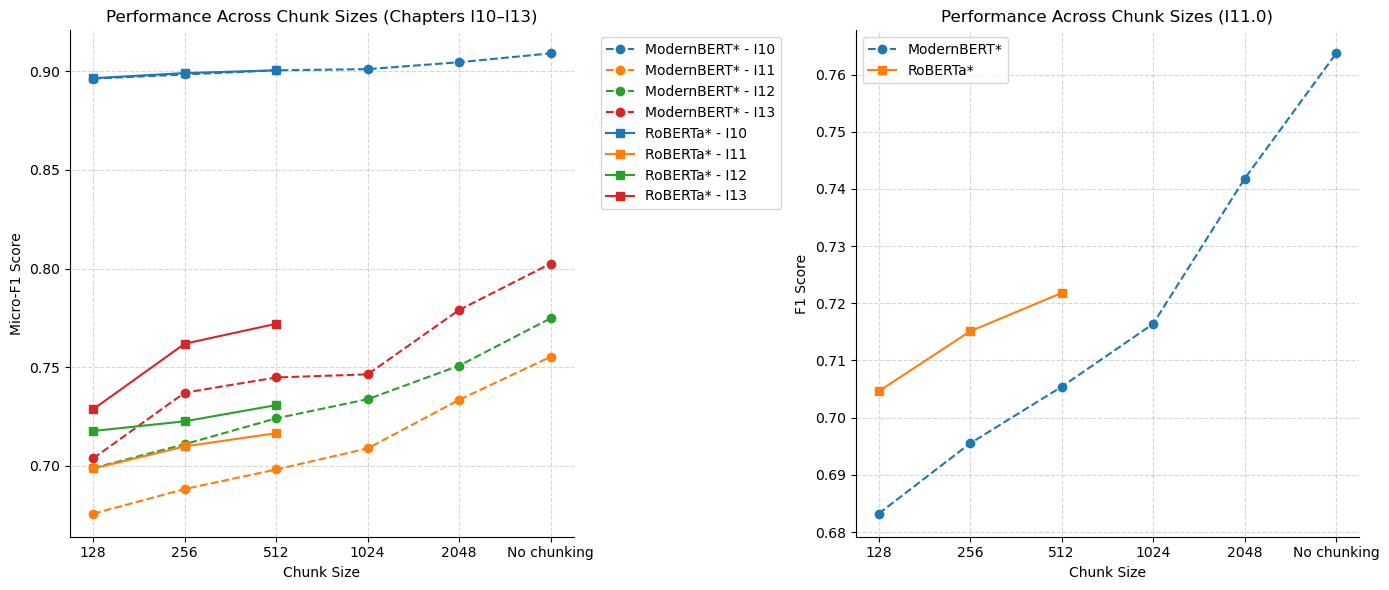

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("hypertension_blocks.csv")

# Normalize chunk-size labels (use strings; map your "no chunking" sentinel if needed)
df["Chunk Size"] = df["Chunk Size"].astype(str).str.strip()
df["Chunk Size"] = df["Chunk Size"].replace({"6000": "No chunking"})  # adjust if your sentinel differs

df["Model"] = df["Model"].replace({
    "ModernBert": "ModernBERT*",
    "RoBERTa": "RoBERTa*"
})
# Desired x order (even spacing)
order = ["128", "256", "512", "1024", "2048", "No chunking"]
xpos = list(range(len(order)))   # 0..5

# Metric styles (colors+markers per code block)
metrics_left = ["I10", "I11", "I12", "I13"]
metric_styles = {
    "I10":  dict(color="#1f77b4"),
    "I11":  dict(color="#ff7f0e"),
    "I12":  dict(color="#2ca02c"),
    "I13":  dict(color="#d62728"),
}

# Line styles by model (optional)
model_style = lambda m: ("-", "o") if m == "ModernBERT*" else ("--", "s")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------- Left: I10–I13 with colors+markers per code, line style per model -------
for model in df["Model"].unique():
    dfm = df[df["Model"] == model].copy()
    # reindex per the order so x positions align; produce a row per chunk label
    dfm = dfm.set_index("Chunk Size").reindex(order)
    for metric in metrics_left:
        if metric not in dfm.columns:  # skip if column not present
            continue
        y = dfm[metric].values
        ls, default_marker = model_style(model)
        style = metric_styles[metric]
        axes[0].plot(
            xpos, y,
            label=f"{model} - {metric}",
            color=style["color"],
            marker="o" if model == "ModernBERT*" else "s",
            linestyle="--" if model == "ModernBERT*" else "-"
        )

axes[0].set_title("Performance Across Chunk Sizes (Chapters I10–I13)")
axes[0].set_xlabel("Chunk Size")
axes[0].set_ylabel("Micro-F1 Score")
axes[0].set_xticks(xpos, order, rotation=0)
axes[0].grid(True, linestyle="--", alpha=0.5)  # left plot
axes[0].legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# ------- Right: I11.0 only, own y-scale -------
if "I11.0" in df.columns:
    for model in df["Model"].unique():
        dfm = df[df["Model"] == model].copy()
        dfm = dfm.set_index("Chunk Size").reindex(order)
        y = dfm["I11.0"].values
        ls, mk = model_style(model)
        axes[1].plot(
            xpos, y,
            label=model,
            marker="o" if model == "ModernBERT*" else "s",
            linestyle="--" if model == "ModernBERT*" else "-"
        )

axes[1].set_title("Performance Across Chunk Sizes (I11.0)")
axes[1].set_xlabel("Chunk Size")
axes[1].set_ylabel("F1 Score")
axes[1].grid(True, linestyle="--", alpha=0.5)  # left plot
axes[1].set_xticks(xpos, order, rotation=0)
axes[1].legend()

for ax in axes:  # apply to both subplots
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()


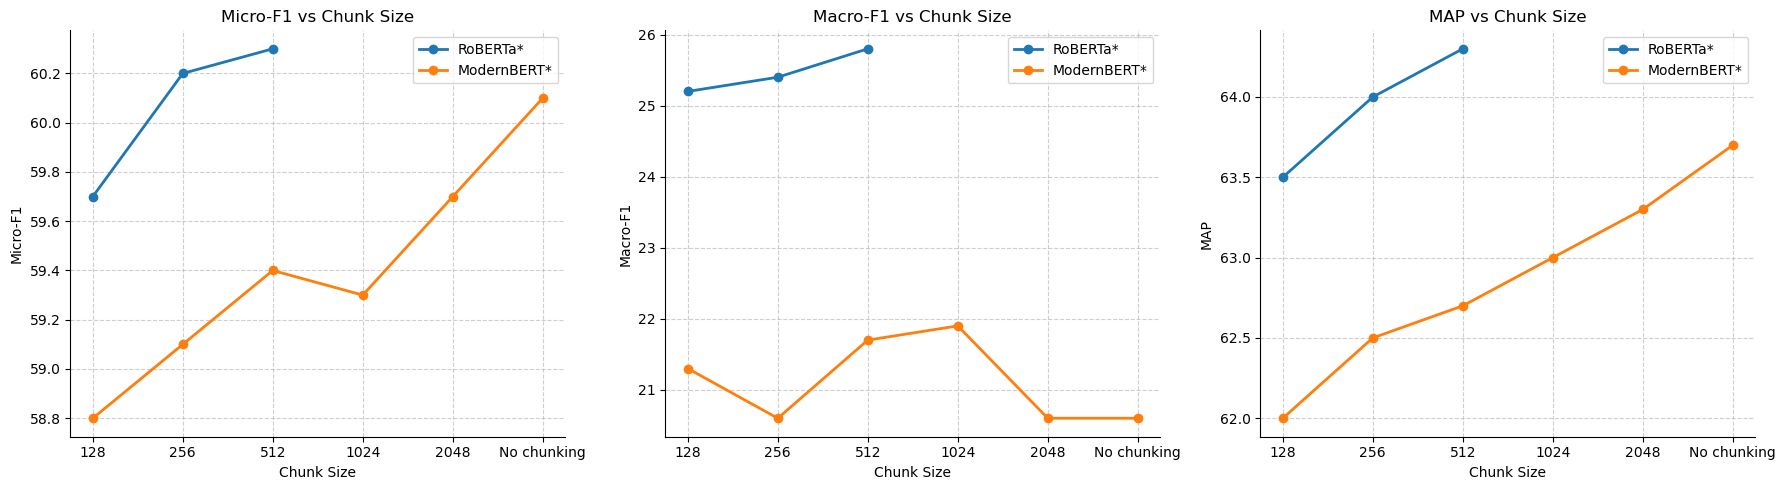

In [74]:
import matplotlib.pyplot as plt

# Data
chunk_labels = ["128", "256", "512", "1024", "2048", "No chunking"]  # categorical x-axis
x = range(len(chunk_labels))

roberta_micro = [59.7, 60.2, 60.3, None, None, None]
roberta_macro = [25.2, 25.4, 25.8, None, None, None]
roberta_map   = [63.5, 64.0, 64.3, None, None, None]

modern_micro = [58.8, 59.1, 59.4, 59.3, 59.7, 60.1]
modern_macro = [21.3, 20.6, 21.7, 21.9, 20.6, 20.6]
modern_map   = [62.0, 62.5, 62.7, 63.0, 63.3, 63.7]

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Micro-F1
axes[0].plot(x[:3], roberta_micro[:3], label="RoBERTa*", linewidth=2, marker="o")
axes[0].plot(x, modern_micro, label="ModernBERT*", linewidth=2, marker="o")
axes[0].set_title("Micro-F1 vs Chunk Size")
axes[0].set_xlabel("Chunk Size")
axes[0].set_ylabel("Micro-F1")
axes[0].set_xticks(x)
axes[0].set_xticklabels(chunk_labels)

# Macro-F1
axes[1].plot(x[:3], roberta_macro[:3], label="RoBERTa*", linewidth=2, marker="o")
axes[1].plot(x, modern_macro, label="ModernBERT*", linewidth=2, marker="o")
axes[1].set_title("Macro-F1 vs Chunk Size")
axes[1].set_xlabel("Chunk Size")
axes[1].set_ylabel("Macro-F1")
axes[1].set_xticks(x)
axes[1].set_xticklabels(chunk_labels)

# MAP
axes[2].plot(x[:3], roberta_map[:3], label="RoBERTa*", linewidth=2, marker="o")
axes[2].plot(x, modern_map, label="ModernBERT*", linewidth=2, marker="o")
axes[2].set_title("MAP vs Chunk Size")
axes[2].set_xlabel("Chunk Size")
axes[2].set_ylabel("MAP")
axes[2].set_xticks(x)
axes[2].set_xticklabels(chunk_labels)

# Formatting
for ax in axes:
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    # Remove top and right borders
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

